# DoppelGanger - Find Celebrity Look Alike

In this notebook you will find a fun application. You will be able to find the celebrity that looks like you! And only using OpenCV, Dlib and numpy!

This is posible thanks to the face recognition algorithm:

>In short, they convert a face into a high dimensional vector and then learn a feature space in that high dimension. Once the algorithm learns a robust feature space, you can add more people to the same space and they will form a different cluster.
> *Extract of OpenCV course lesson*

So let's begin.

### Step 1

First we need to import the packages: dlib, opencv (cv2) and numpy. You'll need numpy to work with matrixes.

If you don't have installed yet you can install them with pip, using the commands:
```
pip install opencv-python
pip install dlib
pip install numpy
```

In [ ]:
import os,random,glob
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

Also you'll want to install matplotlib to see the images on this notebook, so if you don't have installed you can install it with:
```
pip install matplotlib
```

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

## Step 2

Here we need to initialize the face detector, the shape predictor and the face recognition model, these instances will let us to obtain the vectors of the faces and then we will be able to find the celebrity look alike us.

If you don't have the configuration files, below are the commands to download them

In [ ]:
# Download dlib models
# Landmark model
!wget https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
# Face recognition model
!wget https://github.com/davisking/dlib-models/raw/master/dlib_face_recognition_resnet_model_v1.dat.bz2 -O dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2
# Initialize face detector, facial landmarks detector 
# and face recognizer
faceDetector = dlib.get_frontal_face_detector()
shapePredictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
faceRecognizer = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')

--2020-09-01 22:43:32--  https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2020-09-01 22:43:32--  https://raw.githubusercontent.com/davisking/dlib-models/master/shape_predictor_68_face_landmarks.dat.bz2
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M   136MB/s    in 0.4s  

## Step 3

Here we download our celebrity dataset, the name of the celebrity (labels) and our test images.

In [ ]:
!wget https://www.dropbox.com/s/lulw2jwsblz687g/celeb_mini.zip?dl=1 -O celeb_mini.zip
!unzip celeb_mini.zip

!wget https://www.dropbox.com/s/m7kjjoa1z1hsxw6/celeb_mapping.npy?dl=1 -O celeb_mapping.npy

!wget https://www.dropbox.com/s/3yi89blp4lhiw6y/test-images.zip?dl=1 -O test-images.zip
!unzip test-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: celeb_mini/n00000156/n00000156_00000429.JPEG  
  inflating: celeb_mini/n00000156/n00000156_00000464.JPEG  
  inflating: celeb_mini/n00000156/n00000156_00000645.JPEG  
  inflating: celeb_mini/n00000156/n00000156_00000096.JPEG  
  inflating: celeb_mini/n00000156/n00000156_00000014.JPEG  
   creating: celeb_mini/n00000448/
  inflating: celeb_mini/n00000448/n00000448_00000586.JPEG  
  inflating: celeb_mini/n00000448/n00000448_00000267.JPEG  
  inflating: celeb_mini/n00000448/n00000448_00000400.JPEG  
  inflating: celeb_mini/n00000448/n00000448_00000375.JPEG  
  inflating: celeb_mini/n00000448/n00000448_00000314.JPEG  
   creating: celeb_mini/n00000073/
  inflating: celeb_mini/n00000073/n00000073_00000220.JPEG  
  inflating: celeb_mini/n00000073/n00000073_00000369.JPEG  
  inflating: celeb_mini/n00000073/n00000073_00000148.JPEG  
  inflating: celeb_mini/n00000073/n00000073_00000386.JPEG  
  inflating: celeb_mini/n00000073/n0000

## Step 4

Here we will prepare all the folders and subfolders that we have to open to load the images.

First we have to load our label map that let us to convert the subfolder name to the name of the celebrity.

In [ ]:
# Root folder of the dataset
faceDatasetFolder = 'celeb_mini'
# Label -> Name Mapping file
labelMap = np.load("celeb_mapping.npy", allow_pickle=True).item()

We select randomly one folder to display the images of one celebrity.

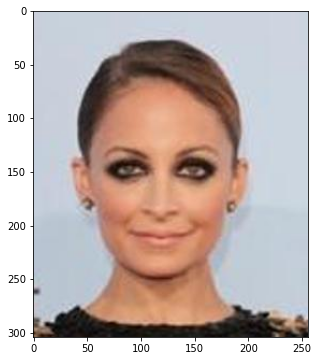

File path = celeb_mini/n00001876/n00001876_00000455.JPEG
Celeb Name: Nicole Richie


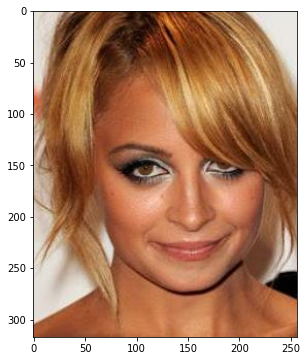

File path = celeb_mini/n00001876/n00001876_00000357.JPEG
Celeb Name: Nicole Richie


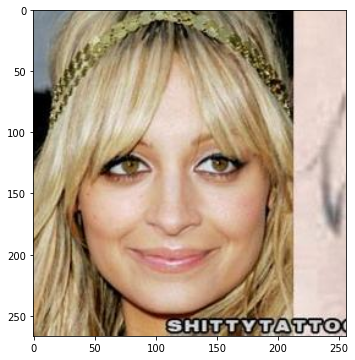

File path = celeb_mini/n00001876/n00001876_00000459.JPEG
Celeb Name: Nicole Richie


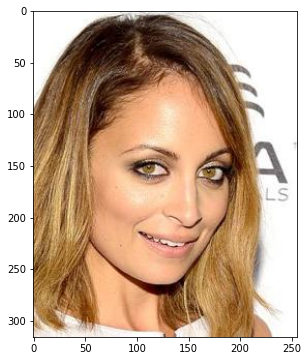

File path = celeb_mini/n00001876/n00001876_00000434.JPEG
Celeb Name: Nicole Richie


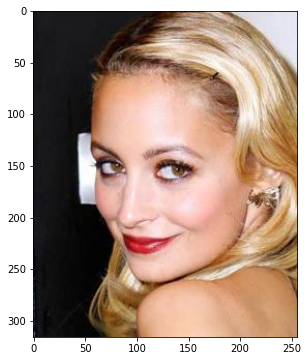

File path = celeb_mini/n00001876/n00001876_00000731.JPEG
Celeb Name: Nicole Richie


In [ ]:
# Each subfolder has images of a particular celeb
subfolders = os.listdir(faceDatasetFolder)

# Let us choose a random folder and display all images
random_folder = random.choice(subfolders)

# Also find out the name of the celeb from the folder name and folder-> name mapping dictionary loaded earlier
celebname = labelMap[random_folder]

# Load all images in the subfolder
imagefiles = os.listdir(os.path.join(faceDatasetFolder, random_folder))

# Read each image and display along with the filename and celeb name
for file in imagefiles:
  # Get full path of each image file
  fullPath = os.path.join(faceDatasetFolder,random_folder,file)
  im = cv2.imread(fullPath)
  plt.imshow(im[:,:,::-1])
  plt.show()
  # Also print the filename and celeb name
  print("File path = {}".format(fullPath))
  print("Celeb Name: {}".format(celebname))

We create an array with the path of all subfolders of the dataset, so this way we can access all of them with a simple for loop.

In [ ]:
# read subfolders in folder "faces"
subfolders = []
for x in os.listdir(faceDatasetFolder):
  xpath = os.path.join(faceDatasetFolder, x)
  if os.path.isdir(xpath):
    subfolders.append(xpath)

Then in the imagePaths array we will have all the images paths so we can load and process them one by one. In the nameLabelMap dictionary we have represented the path of the image (key) to the name of the subfolder of the celebrity (value) this will help us to identify the celebrity that is in the image.

In [ ]:
imagePaths = []
nameLabelMap = {}
for i, subfolder in enumerate(subfolders):
  for x in os.listdir(subfolder):
    xpath = os.path.join(subfolder, x)
    if x.endswith('jpg') or x.endswith('jpeg') or x.endswith('JPEG') or x.endswith('JPG'):
      imagePaths.append(xpath)
      nameLabelMap[xpath] = subfolder.split('/')[-1]

## Step 5

With imagePaths array we process the images one by one with a for loop. The first thing tha we need to do is detect the faces that are present in the images. Then we need to process all the faces detected in a image one by one to obtain its descriptor and save it in an array. Finally with this array of descriptors we calculate the distance between one face descriptor and all descriptors of the celebrities so we can find the celebrity that looks alike.

In [ ]:
# Process images one by one
# We will store face descriptors in an ndarray (faceDescriptorsEnrolled)
# their corresponding labels in dictionary (index)
# and their 
index = {}
paths = []
i = 0
faceDescriptorsEnrolled = None
for imagePath in imagePaths:
  print("processing: {}".format(imagePath))
  # read image and convert it to RGB
  img = cv2.imread(imagePath)

  # detect faces in image
  faces = faceDetector(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  print("{} Face(s) found".format(len(faces)))
  # Now process each face we found
  for k, face in enumerate(faces):

    # Find facial landmarks for each detected face
    shape = shapePredictor(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), face)

    # Compute face descriptor using neural network defined in Dlib.
    # It is a 128D vector that describes the face in img identified by shape.
    faceDescriptor = faceRecognizer.compute_face_descriptor(img, shape)

    # Convert face descriptor from Dlib's format to list, then a NumPy array
    faceDescriptorList = [x for x in faceDescriptor]
    faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
    faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]

    # Stack face descriptors (1x128) for each face in images, as rows
    if faceDescriptorsEnrolled is None:
      faceDescriptorsEnrolled = faceDescriptorNdarray
    else:
      faceDescriptorsEnrolled = np.concatenate((faceDescriptorsEnrolled, faceDescriptorNdarray), axis=0)

    # save the label for this face in index. We will use it later to identify
    # person name corresponding to face descriptors stored in NumPy Array
    paths.append(imagePath)
    index[i] = nameLabelMap[imagePath]
    i += 1

Streaming output truncated to the last 5000 lines.
1 Face(s) found
processing: celeb_mini/n00001028/n00001028_00000209.JPEG
1 Face(s) found
processing: celeb_mini/n00001028/n00001028_00000233.JPEG
1 Face(s) found
processing: celeb_mini/n00001028/n00001028_00000205.JPEG
1 Face(s) found
processing: celeb_mini/n00001028/n00001028_00000746.JPEG
1 Face(s) found
processing: celeb_mini/n00000235/n00000235_00000210.JPEG
1 Face(s) found
processing: celeb_mini/n00000235/n00000235_00000948.JPEG
1 Face(s) found
processing: celeb_mini/n00000235/n00000235_00000358.JPEG
1 Face(s) found
processing: celeb_mini/n00000235/n00000235_00000142.JPEG
1 Face(s) found
processing: celeb_mini/n00000235/n00000235_00000380.JPEG
1 Face(s) found
processing: celeb_mini/n00001130/n00001130_00000733.JPEG
1 Face(s) found
processing: celeb_mini/n00001130/n00001130_00000118.JPEG
1 Face(s) found
processing: celeb_mini/n00001130/n00001130_00000660.JPEG
1 Face(s) found
processing: celeb_mini/n00001130/n00001130_00000314.JPEG


In [ ]:
matplotlib.rcParams['figure.figsize'] = (12.0,12.0)

# Step 6

Here we process our test images with a similar algorithm to we have to do with the celebrity dataset but this time we have to calculate the Euclidean distance between the test face descriptor and all the face descriptors of the dataset (line 29). Then we obtain the index of the minimum distance (line 31), and finally with our paths array we can get the path of the image of the clebrity that looks alike and with our labelMap and index dictionaries we can recover the celebrity name.

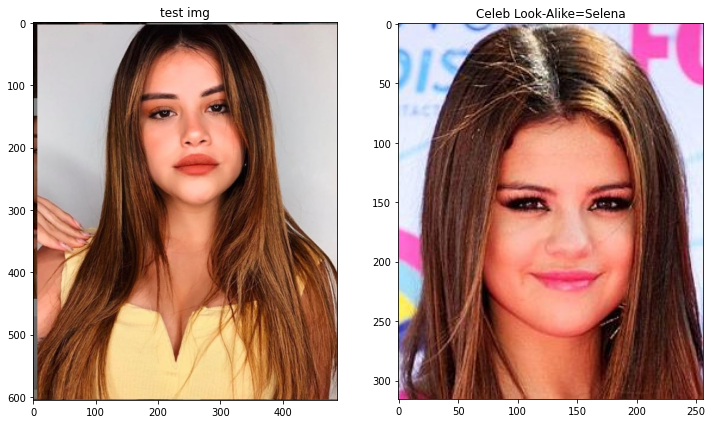

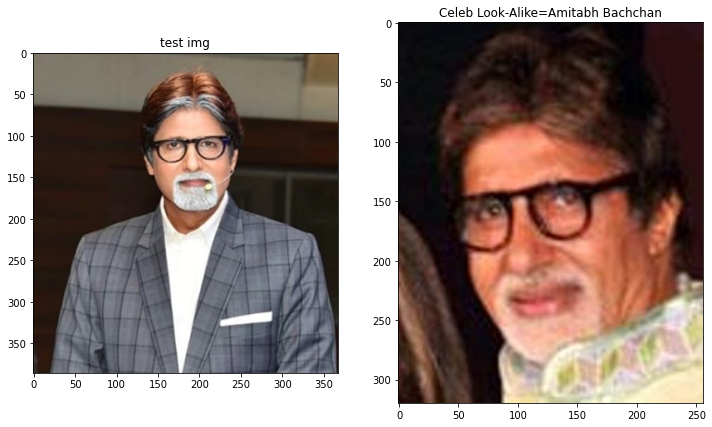

In [ ]:
# read image
testImages = glob.glob('test-images/*.jpg')

for test in testImages:
  im = cv2.imread(test)
  imDlib = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  
  #####################
  # detect faces in image
  faces = faceDetector(cv2.cvtColor(imDlib, cv2.COLOR_BGR2RGB))

  # Now process each face we found
  for face in faces:

    # Find facial landmarks for each detected face
    shape = shapePredictor(cv2.cvtColor(imDlib, cv2.COLOR_BGR2RGB), face)

    # Compute face descriptor using neural network defined in Dlib
    # using facial landmark shape
    faceDescriptor = faceRecognizer.compute_face_descriptor(imDlib, shape)

    # Convert face descriptor from Dlib's format to list, then a NumPy array
    faceDescriptorList = [m for m in faceDescriptor]
    faceDescriptorNdarray = np.asarray(faceDescriptorList, dtype=np.float64)
    faceDescriptorNdarray = faceDescriptorNdarray[np.newaxis, :]

    # Calculate Euclidean distances between face descriptor calculated on face dectected
    # in current frame with all the face descriptors we calculated while enrolling faces
    distances = np.linalg.norm(faceDescriptorsEnrolled - faceDescriptorNdarray, axis=1)
    # Calculate minimum distance and index of this face
    argmin = np.argmin(distances)  # index
  
    celeb_name = labelMap[index[argmin]]
    imCeleb = cv2.imread(paths[argmin])
    ####################
    
    plt.subplot(121)
    plt.imshow(imDlib)
    plt.title("test img")
    
    #TODO - display celeb image which looks like the test image instead of the black image. 
    plt.subplot(122)
    plt.imshow(imCeleb[:,:,::-1])
    plt.title("Celeb Look-Alike={}".format(celeb_name))
    plt.show()